<a href="https://colab.research.google.com/github/jacob7123/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problem.

A classification is where you try to classifysomething as one thing or another.

A few types of classification problem:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [61]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
           noise=0.03,
           random_state=42)

In [62]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [63]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it!

In [64]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


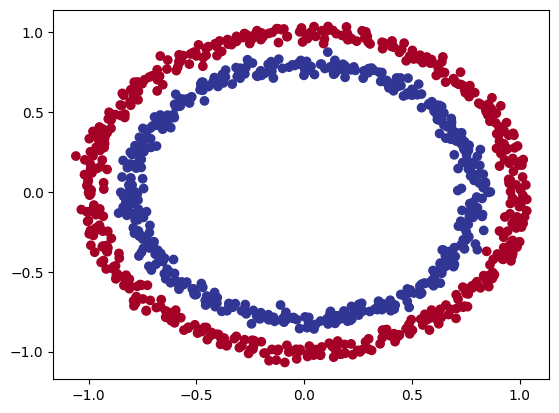

In [65]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Imput and output shapes

In [66]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [67]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [68]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


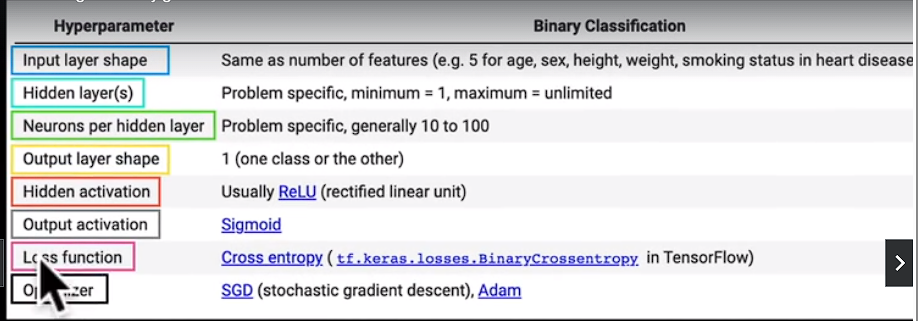

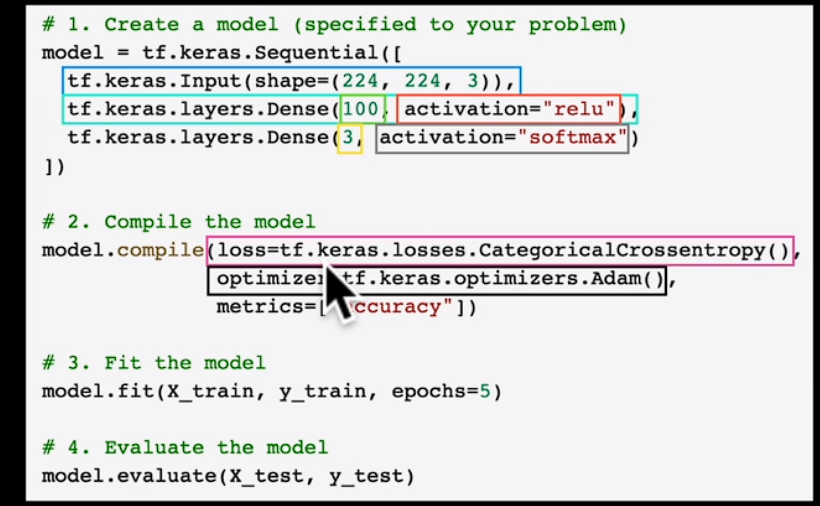

In [69]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [70]:
# Set the random_seed
tf.random.set_seed(42)

# 1. Create the model using the Sequentail API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2544 - accuracy: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 1.8679 - accuracy: 0.4990
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7345 - accuracy: 0.4900
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6984 - accuracy: 0.4940


In [71]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy... it is performing as if is is guessing.

So let's step things up a notch and add an extra layer.


In [72]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.SGD(),
        metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [73]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933303475379944, 0.5]

In [74]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can inprove our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layers.
2. Compiling a model - here we might to choose a different optimization function such as Adam insteat of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs(leave it training for longer).

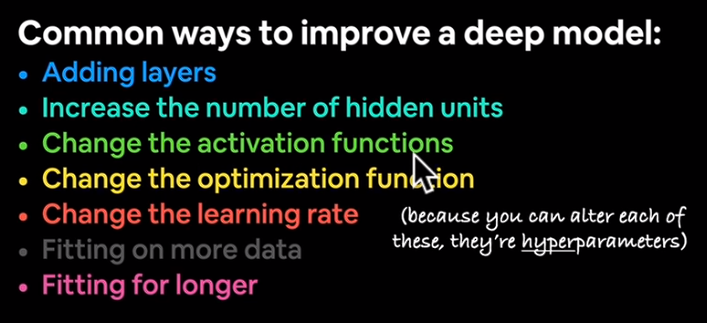

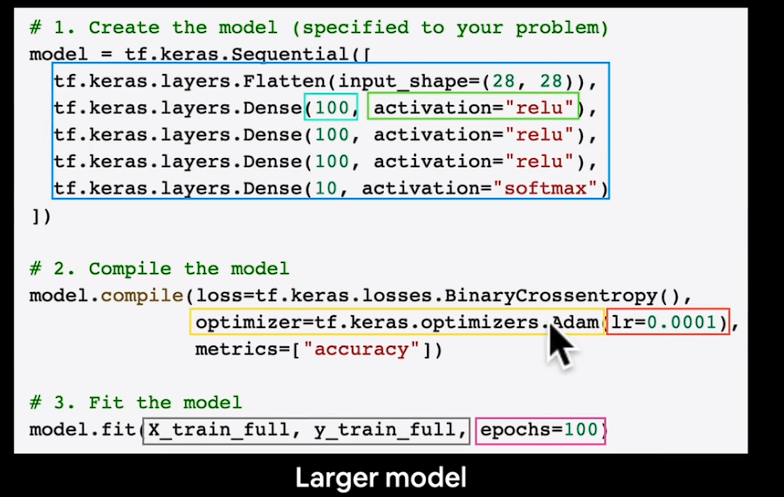

In [75]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model(this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dens neurons, and 100 is hidden units
  tf.keras.layers.Dense(10), # add another layer with 10 neurous
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [76]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.5070


[0.7035096883773804, 0.5070000290870667]

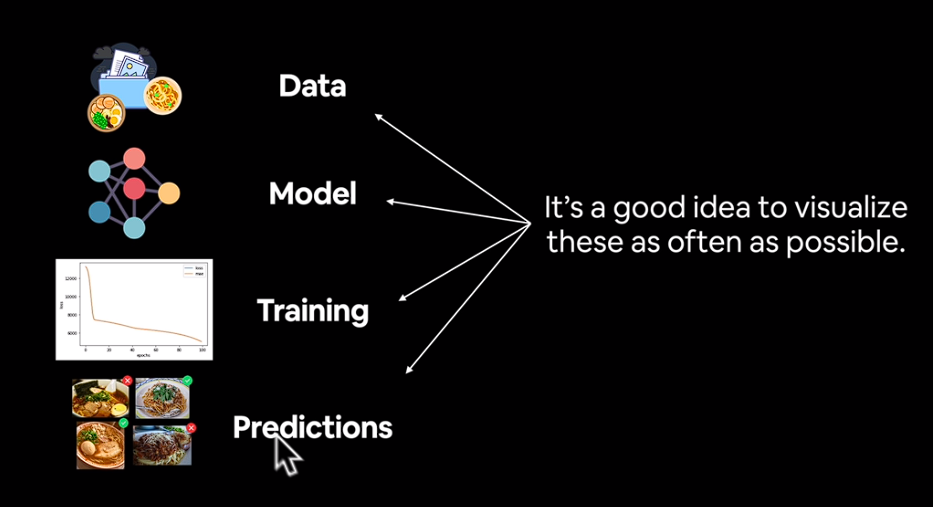

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and label (Y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prections as well as a line between zones(where each unique class falls)

In [77]:
import numpy as np

In [78]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
              np.linspace(y_min, y_max, 100))

  # Create X value(we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multicalss classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 966us/step
doing binary classification


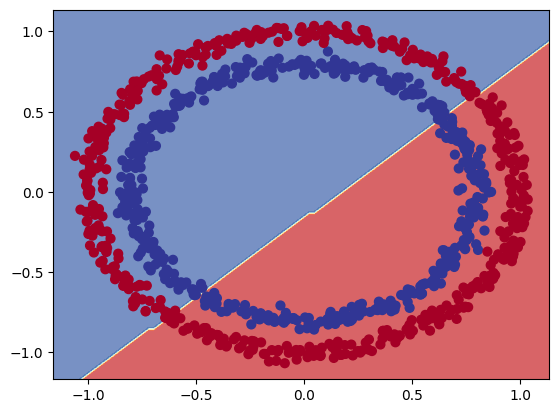

In [79]:
# Check out predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [80]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

oh wait... we compiled our model for a binary classification problem.

But... we are working on a regression problem, let's change the model to suit our data.

In [81]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 516.6592 - mae: 516.6592
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 402.5659 - mae: 402.5659
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 291.4430 - mae: 291.4430
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 175.1169 - mae: 175.1169
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 63.3510 - mae: 63.3510
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 79.4456 - mae: 79.4456
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 85.4180 - mae: 85.4180
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 54.6271 - mae: 54.6271
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 48.0545 - mae: 48.0545
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 49.8894 - mae: 49.8894
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


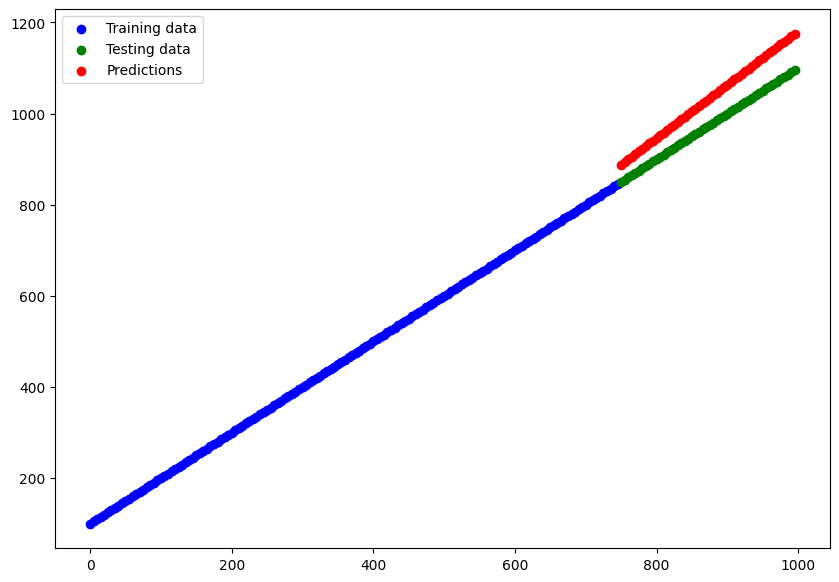

In [83]:
# Mak predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [91]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4246 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4225 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.4131 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3879 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3871 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3869 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3861 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3856 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3851 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3846 - accuracy: 0.4850
Epoch 11/

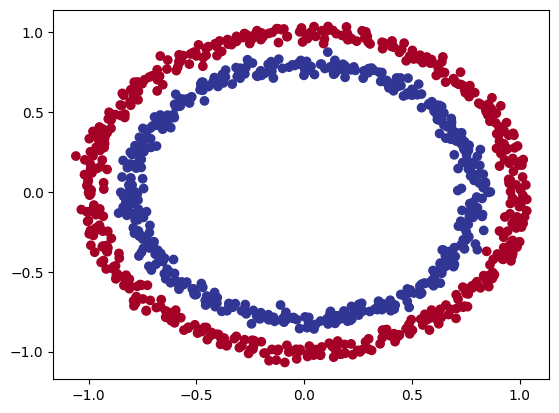

In [92]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 868us/step
doing binary classification


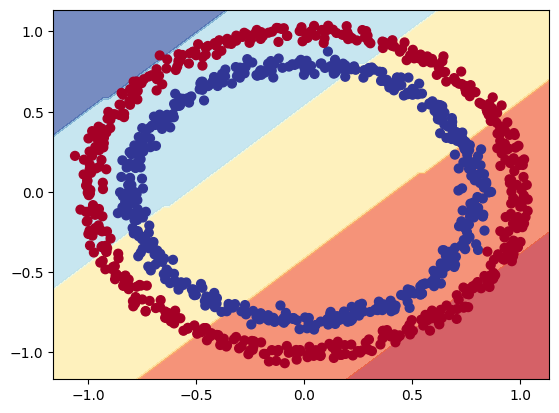

In [93]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
            X=X,
            y=y)

Let's try build our first neural network with a non-linear activation function.

In [95]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 4.9182 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6819 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5452 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4962 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4738 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4651 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4574 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4511 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4347 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4262 - accuracy: 0.4710
Epoch 11/

In [109]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model(2 hidden layers and 4 neurons for each)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 5.6911 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 5.1682 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 4.2164 - accuracy: 0.4680
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 3.0663 - accuracy: 0.4590
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 2.6873 - accuracy: 0.4850
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 1.8163 - accuracy: 0.4950
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 0.9415 - accuracy: 0.4930
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8907 - accuracy: 0.4940
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8649 - accuracy: 0.4920
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 0.8444 - accuracy: 0.4940
Epoch 11/

In [110]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9910


[0.04167274758219719, 0.9909999966621399]

313/313 [==============================] - 0s 923us/step
doing binary classification


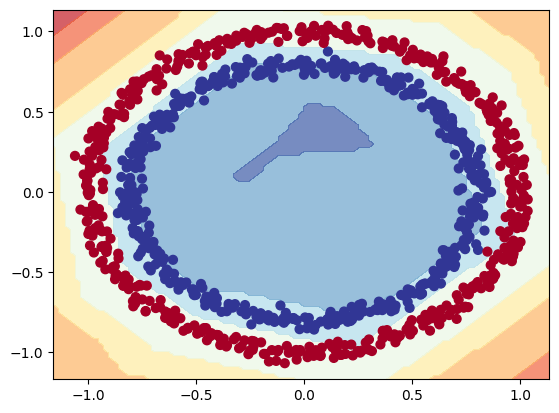

In [111]:
plot_decision_boundary(model=model_6,
            X=X,
            y=y)

In [122]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model(add output layer activation)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.4940
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.5150
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5120
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5080
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5100
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.5100
Epoch 11/

In [123]:
# 4. Evaluate our latest model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.9050


[0.39826199412345886, 0.9049999713897705]

313/313 [==============================] - 0s 1ms/step
doing binary classification


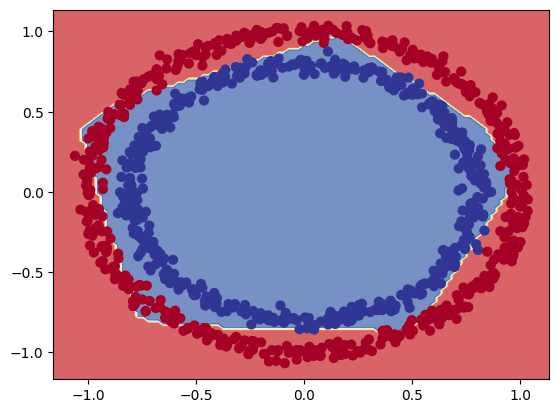

In [124]:
# Let's visualize our incredible metrics
plot_decision_boundary(model=model_7, X=X, y=y)

🤔 **Question:** What is wrong the predictions we have made? Are we really evaluating our model coorectly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear(non-straight line) functions** is one of the key fundamentals of neural networks.